# Exploratory Data Analysis & Visualization

 Created by Yiyu Tao

### Dataset
Homicide Reports, 1980-2014\
URL: https://www.kaggle.com/murderaccountability/homicide-reports

### Import Python Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Drop useless information\
Set index

In [2]:
homicide = pd.read_csv('homicide-reports.csv',index_col='Record ID')
homicide.drop(homicide.columns[homicide.columns.str.contains('Agency',case = False)],axis = 1,inplace=True)
homicide.drop(homicide.columns[homicide.columns.str.contains('Record',case = False)],axis = 1,inplace=True)
homicide

,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
Record ID,,,,,,,,,,,,,,,,,,,
1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638450,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0
638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0


In [3]:
homicide.columns

Index(['City', 'State', 'Year', 'Month', 'Incident', 'Crime Type',
       'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon',
       'Victim Count', 'Perpetrator Count'],
      dtype='object')

In [4]:
for each in homicide.columns:
    print (homicide[each].unique())

['Anchorage' 'Juneau' 'Nome' ... 'Rooks' 'McCone' 'Antelope']
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Florida' 'Georgia'
 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota'
 'Missouri' 'Mississippi' 'Montana' 'Nebraska' 'North Carolina'
 'North Dakota' 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada'
 'New York' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhodes Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Vermont' 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming']
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014]
['January' 'March' 'April' 'May' 'June' 'July' 'August' 'December'
 'November' 'February' 'October' 'September']
[  1   2   3   4  41   5   6   7   8   9

## Data Cleansing 

In [5]:
# Create a copy without Unknown Data
new_homicide = homicide.copy()
for each in new_homicide.columns:
    new_homicide = new_homicide[~new_homicide[each].astype(str).str.contains('Unknown')]

In [6]:
# Drop unusual data
homicide.drop(homicide[homicide['Perpetrator Age'] == ' '].index,inplace=True)
homicide['Perpetrator Age']=homicide['Perpetrator Age'].astype(float)
homicide = homicide[homicide['Perpetrator Age'] >= 2]
homicide = homicide[homicide['Victim Age'] <= 100]

In [7]:
homicide

,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
Record ID,,,,,,,,,,,,,,,,,,,
1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0
4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0
6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Unknown,Male,36.0,White,Unknown,Acquaintance,Rifle,0,0
7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Unknown,Male,27.0,Black,Unknown,Wife,Knife,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,Yes,Male,29,Native American/Alaska Native,Unknown,Male,67.0,Black,Unknown,Friend,Firearm,0,0
638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0
638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0


## Visualization

### Basic

Start with 1-D plot displaying basic information

1. Time

Text(0.5, 1.0, 'Manslaughter by Negligence')

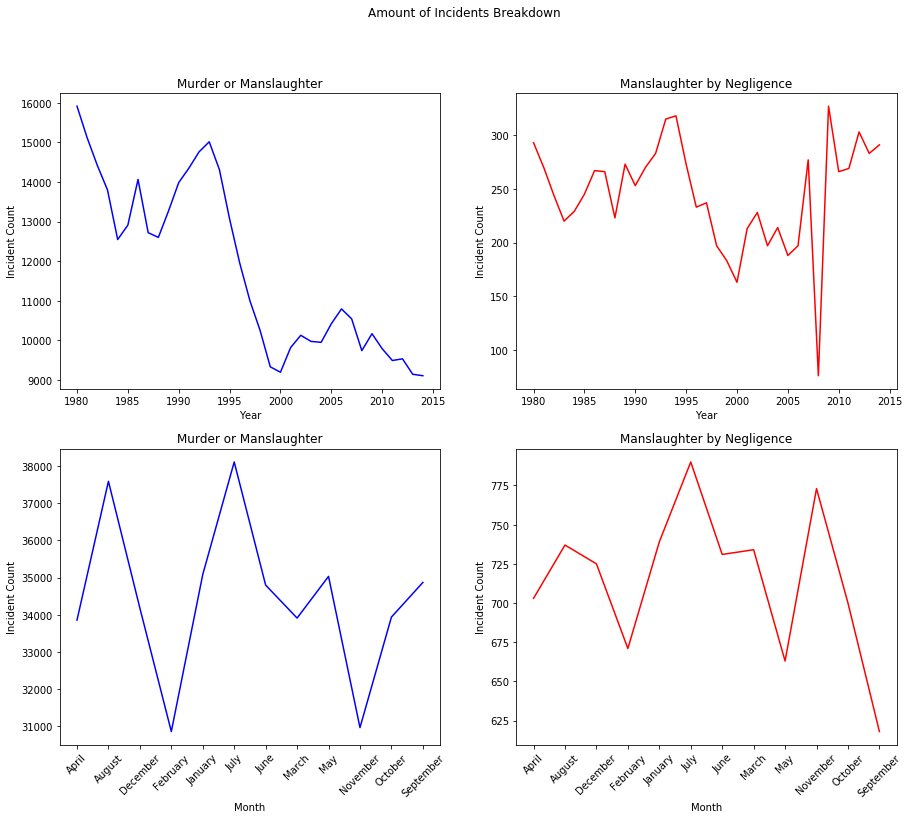

In [18]:
# Use pivot table to organize data 
case_year=pd.pivot_table(homicide,values='Incident',columns='Crime Type',index=['Year'],aggfunc='count')
case_month=pd.pivot_table(homicide,values='Incident',columns='Crime Type',index=['Month'],aggfunc='count')
# Create line chart to plot time series data
f, axes = plt.subplots(2,2,figsize=(15,12))
plt.suptitle('Amount of Incidents Breakdown')


plt.subplot(2,2,1)
plt.plot(case_year['Murder or Manslaughter'],c='b')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Murder or Manslaughter')

plt.subplot(2,2,2)
plt.plot(case_year['Manslaughter by Negligence'],c='r')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Manslaughter by Negligence')

plt.subplot(2,2,3)
plt.plot(case_month['Murder or Manslaughter'],c='b')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.title('Murder or Manslaughter')

plt.subplot(2,2,4)
plt.plot(case_month['Manslaughter by Negligence'],c='r')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.title('Manslaughter by Negligence')

2. State and City

Text(0, 0.5, 'Count')

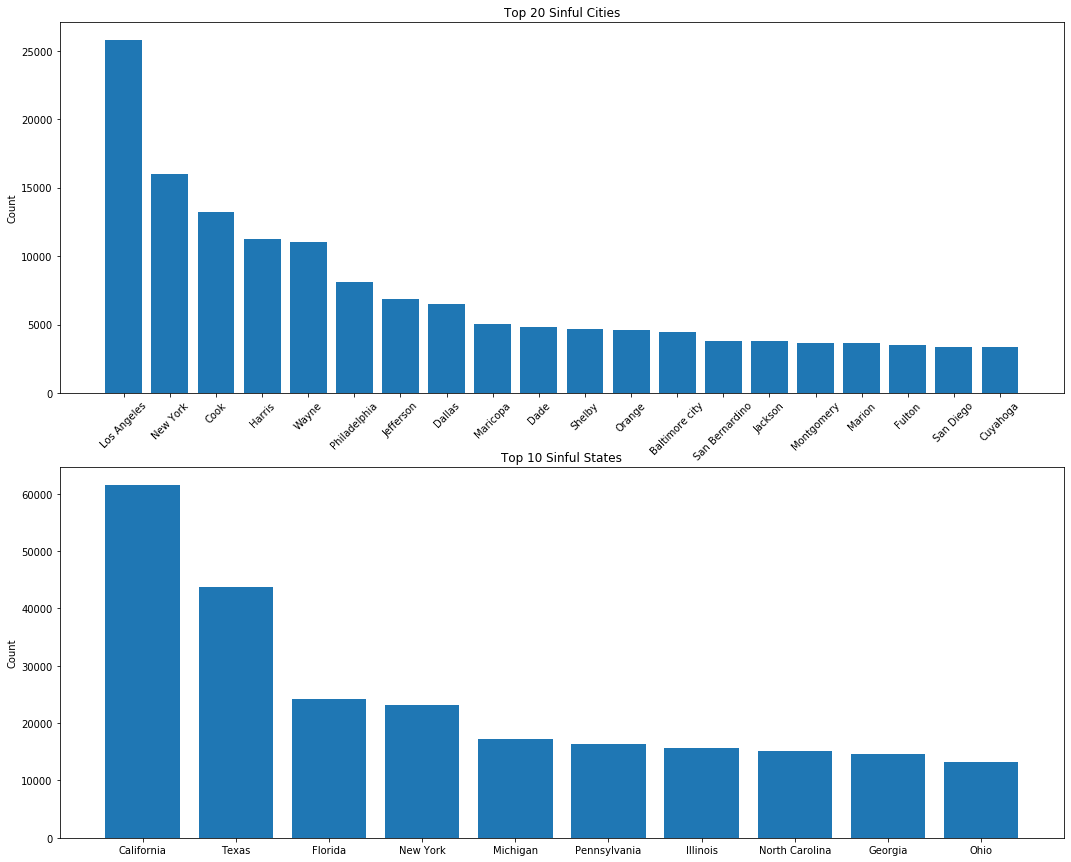

In [20]:
sin_city = homicide['City'].value_counts().sort_values(ascending=False)[:20]
sin_state = homicide['State'].value_counts().sort_values(ascending=False)[:10]

# Use sorted dataframe to create bar graph, easy to compare
f, axes = plt.subplots(2,1,figsize=(18,15))
plt.subplot(2,1,1)
plt.title('Top 20 Sinful Cities')
plt.bar(np.arange(20),sin_city.values)
plt.xticks(np.arange(20),('Los Angeles','New York','Cook','Harris','Wayne','Philadelphia','Jefferson','Dallas','Maricopa',
                          'Dade','Shelby','Orange','Baltimore city','San Bernardino','Jackson','Montgomery',
                          'Marion','Fulton','San Diego','Cuyahoga'),rotation=45)
plt.ylabel('Count')

plt.subplot(2,1,2)
plt.title('Top 10 Sinful States')
plt.bar(np.arange(10),sin_state.values)
plt.xticks(np.arange(10),('California','Texas','Florida','New York','Michigan','Pennsylvania','Illinois','North Carolina',
                         'Georgia','Ohio'))
plt.ylabel('Count')

3. Age

Text(0, 0.5, 'Count')

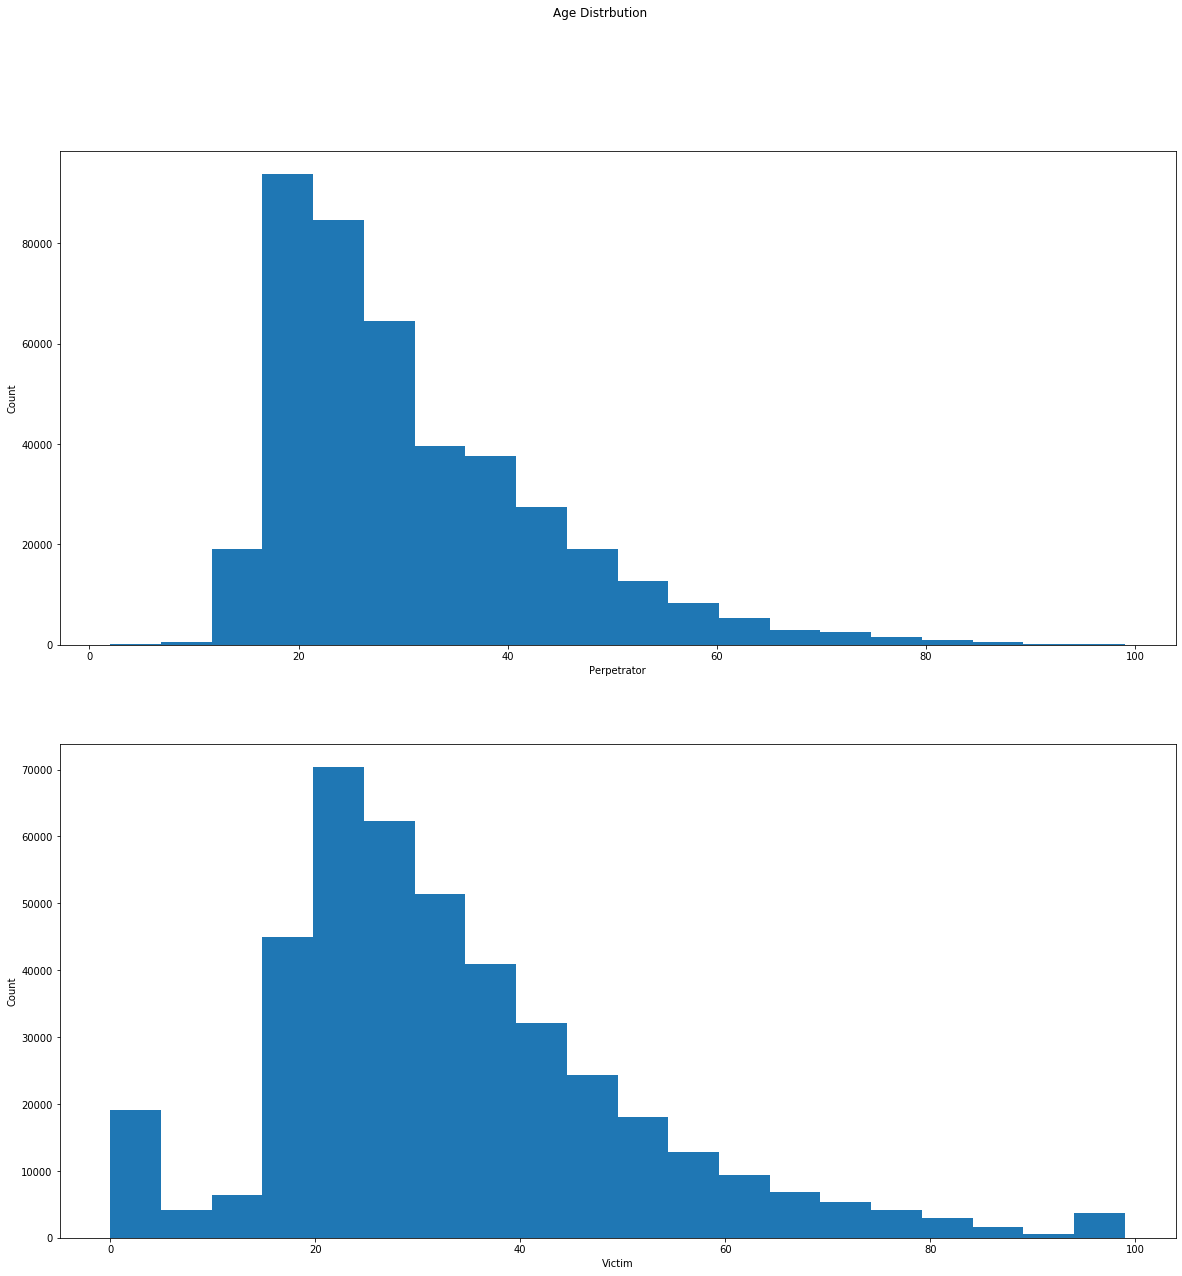

In [24]:
# Use histogram to show the distribution
f, axes = plt.subplots(2,1,figsize = (20,20))
plt.suptitle('Age Distrbution')

plt.subplot(2,1,1)
plt.hist(homicide['Perpetrator Age'],bins=20)
plt.xlabel('Perpetrator')
plt.ylabel('Count')

plt.subplot(2,1,2)
plt.hist(homicide['Victim Age'],bins=20)
plt.xlabel('Victim')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

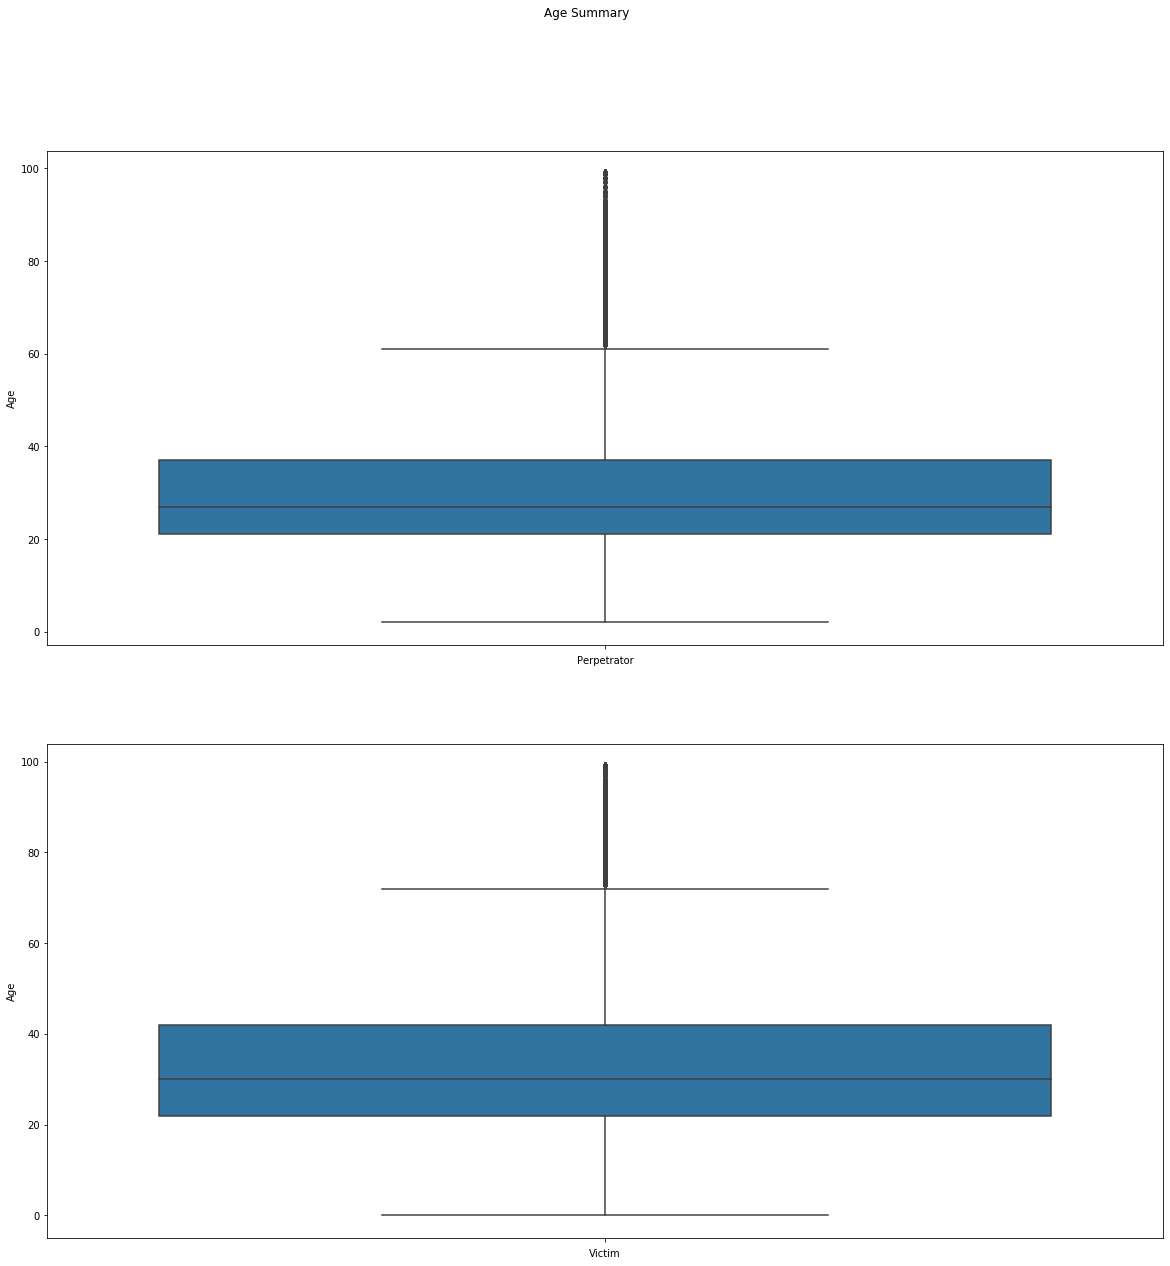

In [25]:
# Use box plot to get mathematical sense of summary of data
# Check median, range contains 50% data, outliers
f, axes = plt.subplots(2,1,figsize = (20,20))
plt.suptitle('Age Summary')

plt.subplot(2,1,1)
sns.boxplot(homicide['Perpetrator Age'],orient='v')
plt.xlabel('Perpetrator')
plt.ylabel('Age')

plt.subplot(2,1,2)
sns.boxplot(homicide['Victim Age'],orient='v')
plt.xlabel('Victim')
plt.ylabel('Age')

## Combinations

Now let's try 2-D plot

1. Crime Solved vs Unsolved

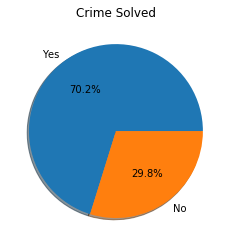

In [41]:
# Create a new column contains numerical data to replace actual words
homicide['Solved'] = homicide['Crime Solved'].apply(lambda x: 0 if x == 'No' else 1)
# Pie chart gives most straightforward comparison on Boolean case
plt.pie(homicide['Solved'].value_counts(),autopct='%1.1f%%',labels=('Yes','No'),shadow=True)
plt.title('Crime Solved')
plt.savefig('dcd.jpg')

2. Weapon & Relationship

#### Dataset with unknwon creates junk graph because of its dominance
rel_weapon=pd.pivot_table(homicide,values='Incident',columns='Weapon',index=['Relationship'],aggfunc='count',fill_value=0)\
plt.figure(figsize=(18,14))\
sns.heatmap(rel_weapon,linewidth=.5,cmap='BuPu',fmt='d')\
plt.title('Weapon Choice by Relationship')

Text(0.5, 1, 'Weapon Choice by Relationship without Unknown')

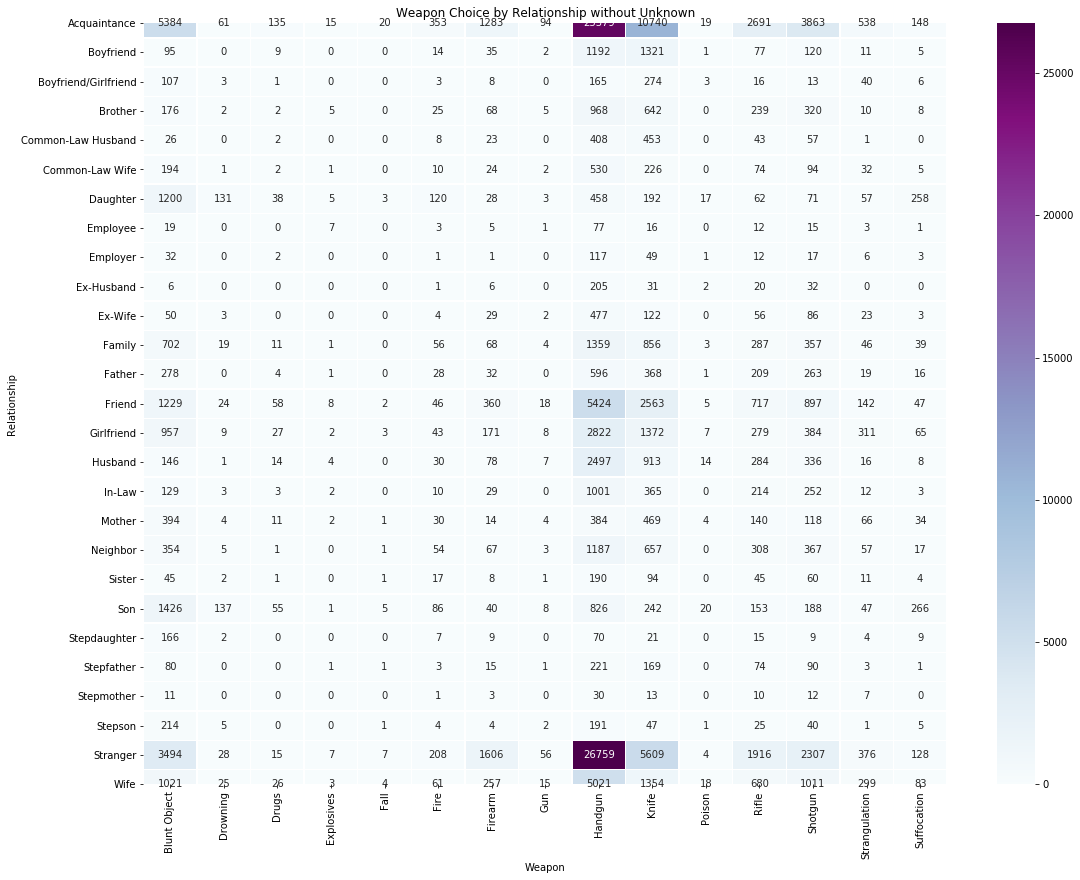

In [29]:
# Heatmap can present number and compare the frequency together
new_relweapon=pd.pivot_table(new_homicide,values='Incident',columns='Weapon',index=['Relationship'],aggfunc='count',fill_value=0)
plt.figure(figsize=(18,14))
sns.heatmap(new_relweapon,linewidth=.5,cmap='BuPu',fmt='d',annot=True)
plt.title('Weapon Choice by Relationship without Unknown')

3. Relationship, Weapon & Race, Gender

Text(0.5, 1, 'Relationship Breakdown by Gender without Unknown')

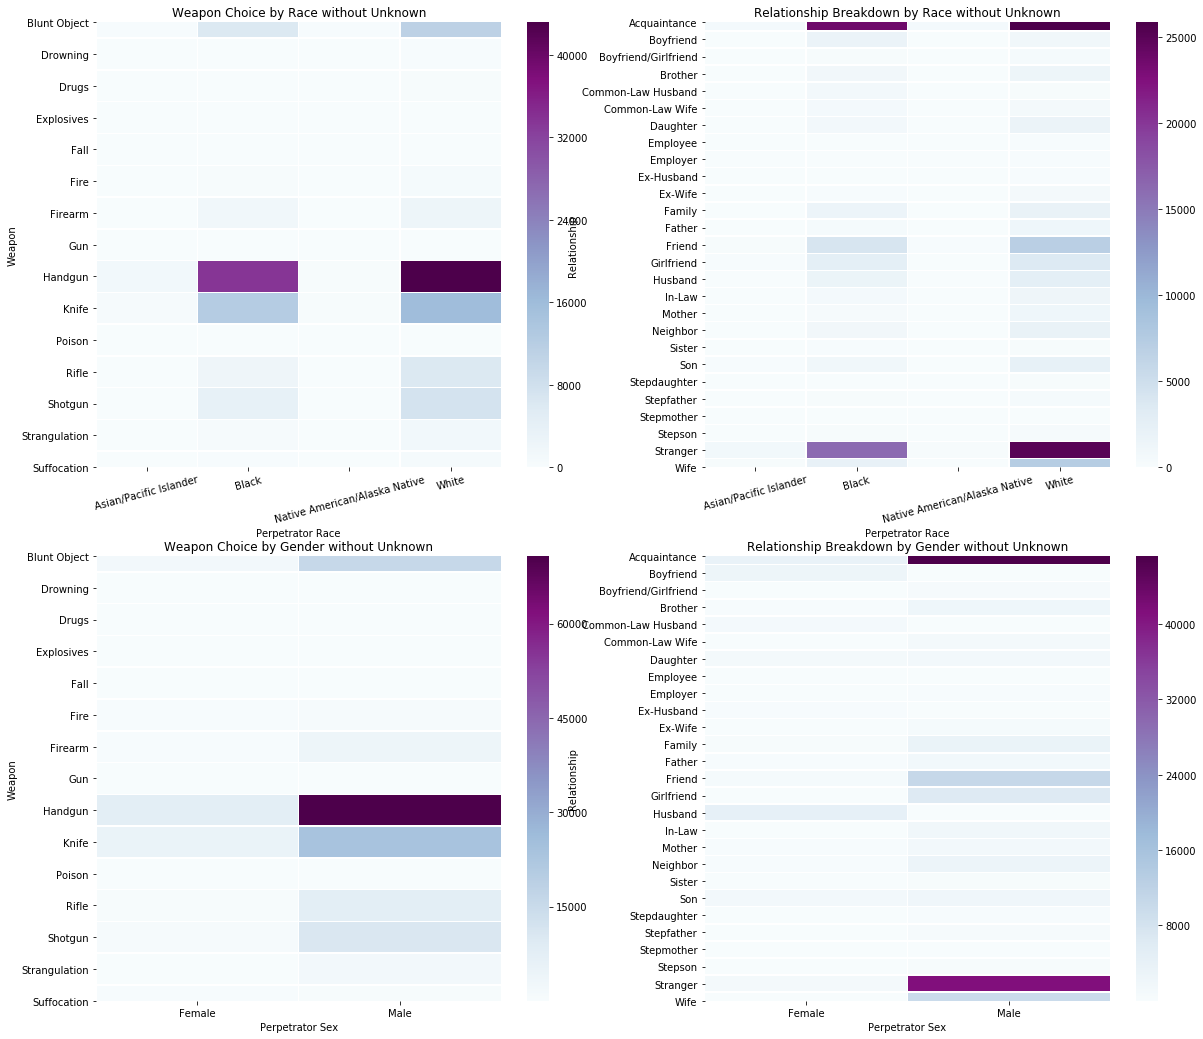

In [30]:
# Four types of combination from these four categorical data 
race_weapon=pd.pivot_table(new_homicide,values='Incident',columns='Perpetrator Race',index=['Weapon'],aggfunc='count',fill_value=0)
race_rel=pd.pivot_table(new_homicide,values='Incident',columns='Perpetrator Race',index=['Relationship'],aggfunc='count',fill_value=0)
new_genweapon=pd.pivot_table(new_homicide,values='Incident',columns='Perpetrator Sex',index=['Weapon'],aggfunc='count',fill_value=0)
new_genrel=pd.pivot_table(new_homicide,values='Incident',columns='Perpetrator Sex',index=['Relationship'],aggfunc='count',fill_value=0)


f, axes = plt.subplots(2,2,figsize=(20,18))

plt.subplot(2,2,1)
sns.heatmap(race_weapon,linewidth=.5,cmap='BuPu',fmt='d')
plt.title('Weapon Choice by Race without Unknown')
plt.xticks(rotation=15)

plt.subplot(2,2,2)
sns.heatmap(race_rel,linewidth=.5,cmap='BuPu',fmt='d')
plt.title('Relationship Breakdown by Race without Unknown')
plt.xticks(rotation=15)

plt.subplot(2,2,3)
sns.heatmap(new_genweapon,linewidth=.5,cmap='BuPu',fmt='d')
plt.title('Weapon Choice by Gender without Unknown')

plt.subplot(2,2,4)
sns.heatmap(new_genrel,linewidth=.5,cmap='BuPu',fmt='d')
plt.title('Relationship Breakdown by Gender without Unknown')

4. Weapon, Relationship & Age (perpetrator & victim)

Text(0.5, 1.0, 'Relationship Breakdown by Age')

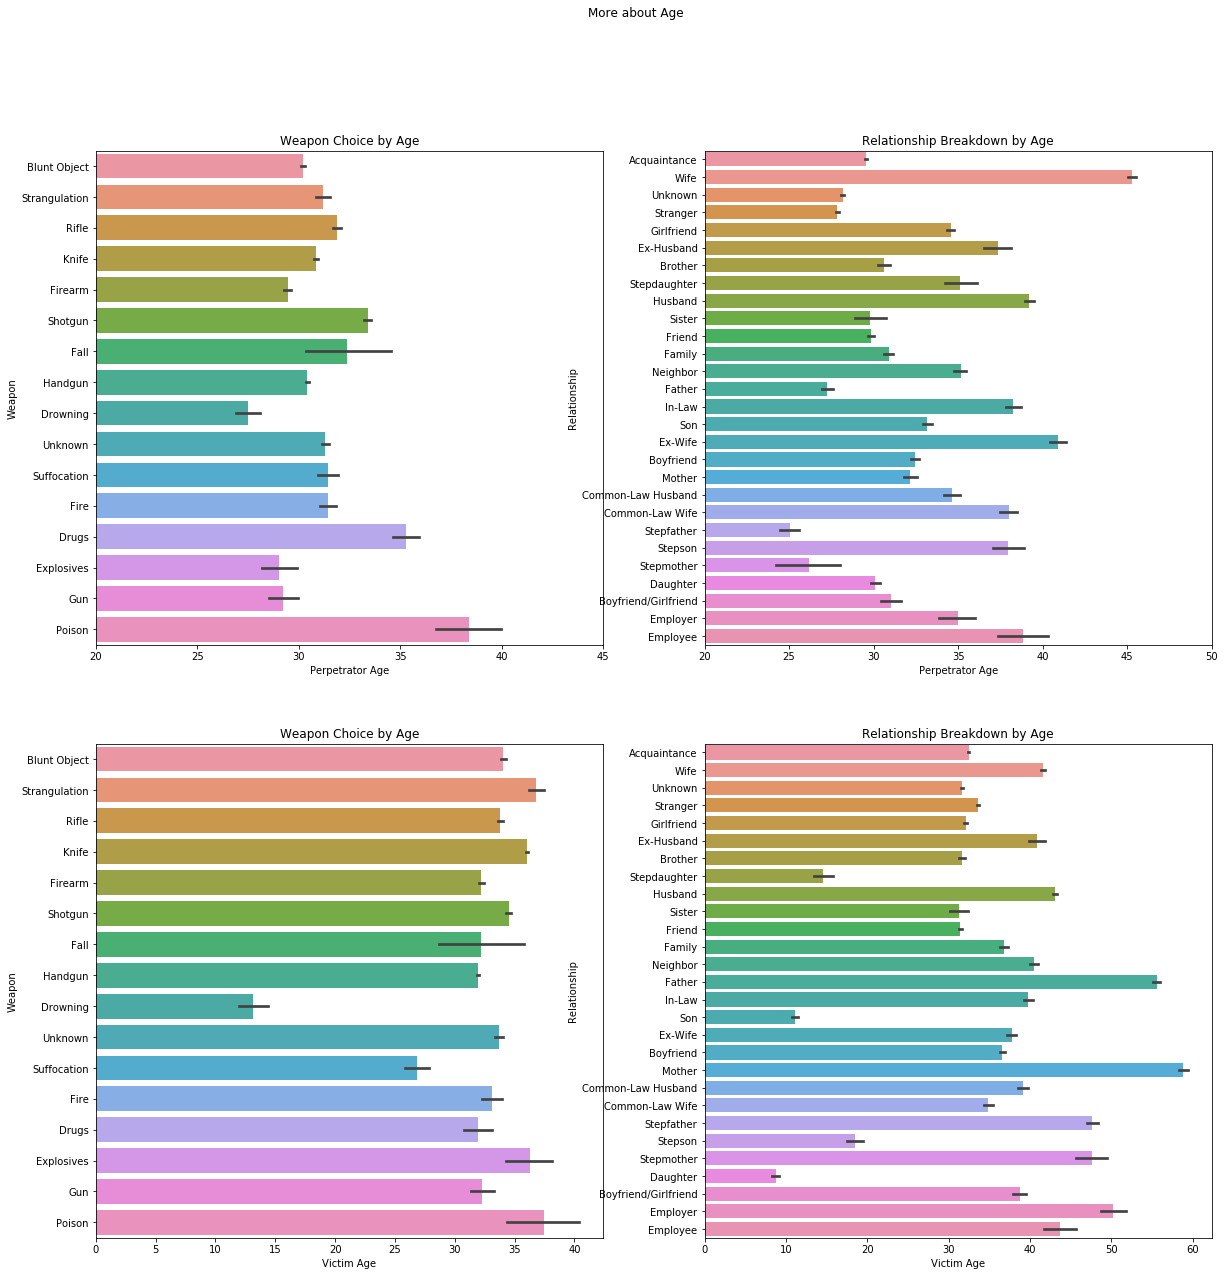

In [33]:
# Seaborn bar chart gives average of numerical data 
f, axes = plt.subplots(2,2,figsize = (20,20))
plt.suptitle('More about Age')
plt.subplot(2,2,1)
sns.barplot('Perpetrator Age','Weapon',data=homicide)
plt.title('Weapon Choice by Age')
plt.xlim(20,45)

plt.subplot(2,2,2)
sns.barplot('Perpetrator Age','Relationship',data=homicide)
plt.title('Relationship Breakdown by Age')
plt.xlim(20,50)

plt.subplot(2,2,3)
sns.barplot('Victim Age','Weapon',data=homicide)
plt.title('Weapon Choice by Age')

plt.subplot(2,2,4)
sns.barplot('Victim Age','Relationship',data=homicide)
plt.title('Relationship Breakdown by Age')

5. Perpetrator & Victim

Age

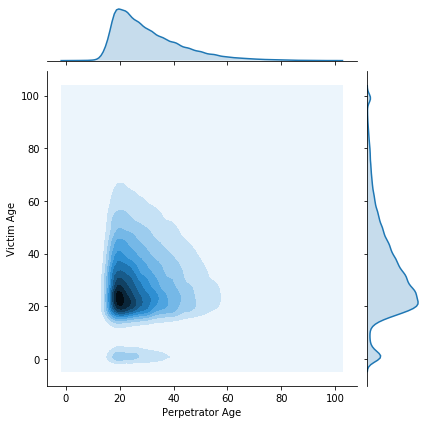

In [34]:
# Jointplot with KDE works best with large dataset
# Use sample due to the long processing time
sns.jointplot(x=homicide['Perpetrator Age'].sample(100000),y=homicide['Victim Age'].sample(100000),kind='kde')

Race

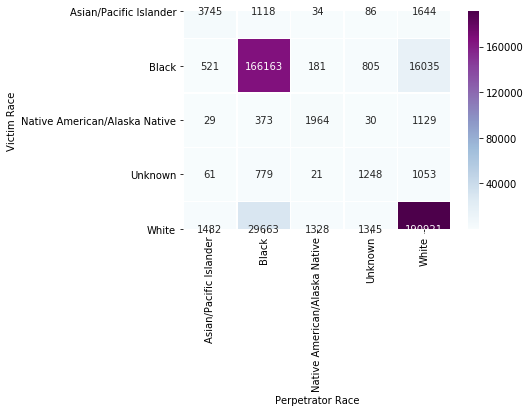

In [35]:
# Heatmap for categorical data 
race = pd.pivot_table(homicide,values='Incident',columns='Perpetrator Race',index=['Victim Race'],aggfunc='count',fill_value=0)
sns.heatmap(race,cmap='BuPu',fmt='d',linewidth=.5,annot=True)

Gender

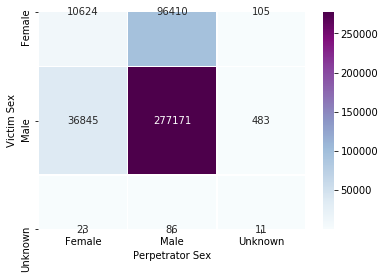

In [36]:
gender = pd.pivot_table(homicide,values='Incident',columns='Perpetrator Sex',index=['Victim Sex'],aggfunc='count',fill_value=0)
sns.heatmap(gender,cmap='BuPu',fmt='d',linewidth=.5,annot=True)

5. Relationship & Solving Status

In [37]:
# Drop three columns that represent 'no relationship'
rel = homicide[['Relationship','Incident']].groupby(['Relationship']).count().reset_index()
rel.drop(rel[rel['Relationship']=='Acquaintance'].index,inplace=True)
rel.drop(rel[rel['Relationship']=='Unknown'].index,inplace=True)
rel.drop(rel[rel['Relationship']=='Stranger'].index,inplace=True)
rel = rel.sort_values(by=['Incident'],ascending=False)

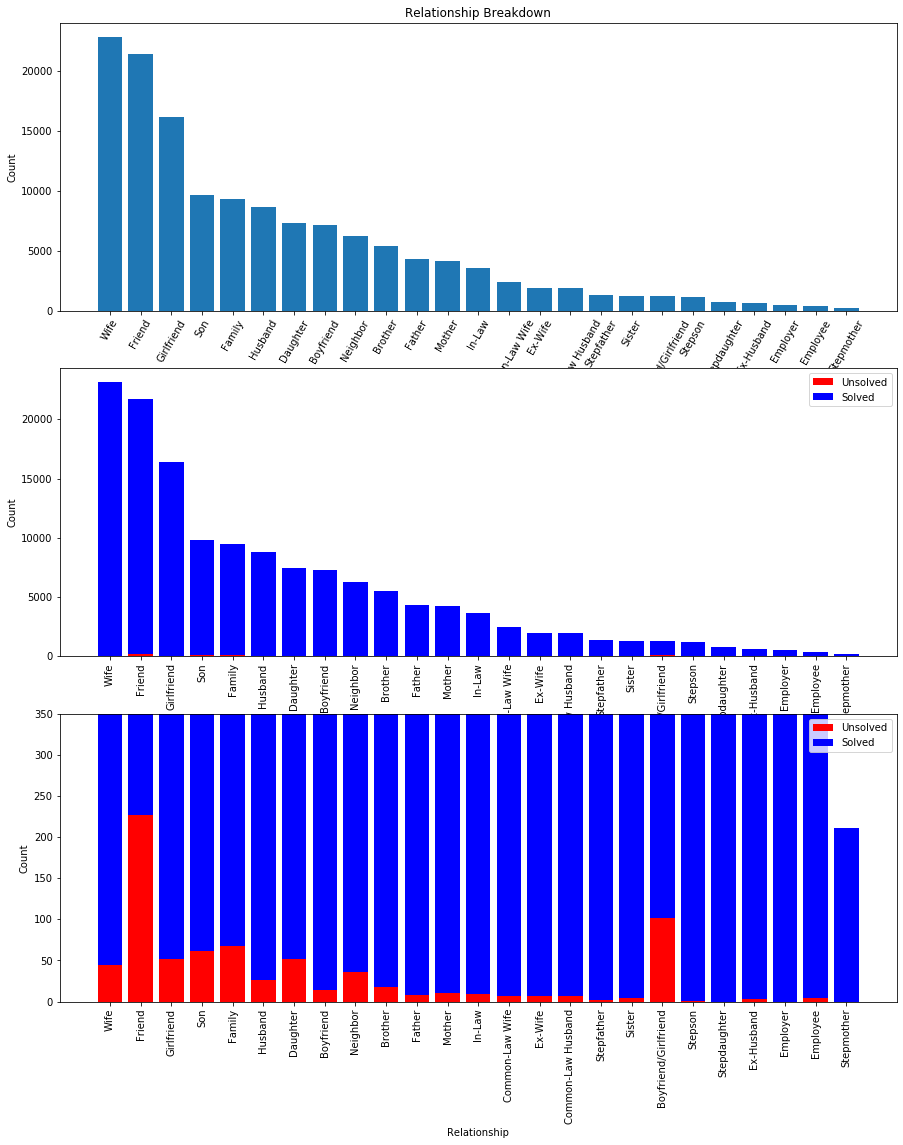

In [42]:
plt.subplots(3,1,figsize=(15,18))

plt.subplot(3,1,1)
n = np.arange(len(rel))
plt.bar(n,rel['Incident'])
plt.xticks(n,rel['Relationship'],rotation=60)
plt.title('Relationship Breakdown')
plt.xlabel('Relationship')
plt.ylabel('Count')
#plt.savefig('3.jpg')

plt.subplot(3,1,2)
rel_solved = homicide[homicide['Solved']==1].pivot_table(['Solved'],index='Relationship',aggfunc='count').drop(['Unknown','Stranger','Acquaintance'])
rel_unsolved = homicide[homicide['Solved']==0].pivot_table(['Solved'],index='Relationship',aggfunc='count').drop(['Unknown','Stranger','Acquaintance'])
rel_unsolved = rel_unsolved.sort_values(by=['Solved'],ascending=False)
rel_solved = rel_solved.sort_values(by=['Solved'],ascending=False)
p1=plt.bar(rel_solved.index,'Solved',data=rel_solved,color='b')
p2=plt.bar(rel_unsolved.index,'Solved',data=rel_unsolved,color='r')
plt.xticks(rotation=90)
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.legend((p2,p1),('Unsolved','Solved'))

# Set XY limits to zoom in
plt.subplot(3,1,3)
rel_solved = homicide[homicide['Solved']==1].pivot_table(['Solved'],index='Relationship',aggfunc='count').drop(['Unknown','Stranger','Acquaintance'])
rel_unsolved = homicide[homicide['Solved']==0].pivot_table(['Solved'],index='Relationship',aggfunc='count').drop(['Unknown','Stranger','Acquaintance'])
rel_unsolved = rel_unsolved.sort_values(by=['Solved'],ascending=False)
rel_solved = rel_solved.sort_values(by=['Solved'],ascending=False)
p1=plt.bar(rel_solved.index,'Solved',data=rel_solved,color='b')
p2=plt.bar(rel_unsolved.index,'Solved',data=rel_unsolved,color='r')
plt.xticks(rotation=90)
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.ylim(0,350)
plt.legend((p2,p1),('Unsolved','Solved'))

## Multidimensional Plot

Weapon, Relationship & Year
 - The meaning of doing this is to examine the weapon usage and relationship frequency and separate each year, normal plot fails to achieve this.
 - Also this plot is interactive, so the viewer can freely select or unselect any year to look over the data in a certain time range.
 - The messy plot issue doesn't influence this project because we're not checking specific number, the crowdedness is enough. 

In [22]:
# Decrease sample size, make sure it's readable.
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

fig = px.line_polar(homicide.sample(3000),color='Year',theta='Relationship',line_close=True,
                    color_discrete_sequence=px.colors.qualitative.G10,
                    template="plotly_dark")
fig.show()

fig = px.line_polar(homicide.sample(3000),color='Year',theta='Weapon',line_close=True,
                    color_discrete_sequence=px.colors.qualitative.G10,
                    template="plotly_dark")
fig.show()

## Map

Make choropleth map with Plotly\
Unfortunately, I'm not able to create county choropleth map because after calculation, there are different 3042 cities in total, also it's impossible to assign each record a county FIPS code which is necessary for generating the plot.

In [45]:
# Read file again to get a new dataframe because we need entire dataset
he = pd.read_csv('homicide-reports.csv',index_col='Record ID')
he2 = he[['City','State','Incident']]
chmap_state = he2.groupby(['State']).count()
chmap_state.drop('City',axis=1,inplace=True)
chmap_state = chmap_state.reset_index()
chmap_state['Incident'] = chmap_state['Incident'].astype(str)
chmap_state['text'] = chmap_state['State'] + '\n' + chmap_state['Incident']

In [47]:
# This dataframe is used for find associated area code, provided by Plotly
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=chmap_state['Incident'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=chmap_state['text'],
    marker_line_color='white', 
    colorbar_title="Incident Count"
))

fig.update_layout(
    title_text='1980-2014 Homicide Reports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, 
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

## Special Cases

1. Juvenile Criminals\
I only focus on weapon choice and relationship because I think the most serious question for homicides under 18 is
 - who did they kill 
 - how did they do that

Text(0.5, 1, 'Under 18')

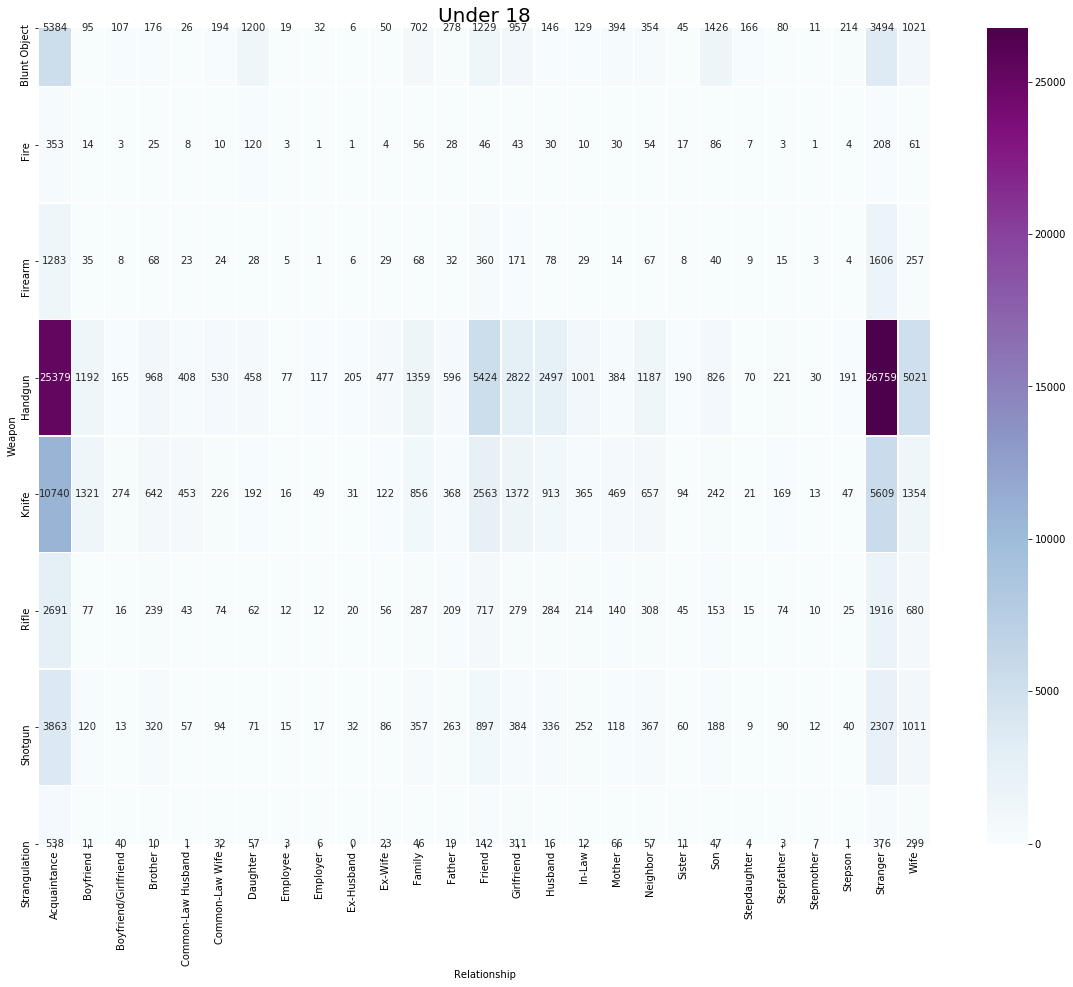

In [50]:
young = homicide[homicide['Perpetrator Age']<=18]
young_relweapon=pd.pivot_table(new_homicide,values='Incident',columns='Relationship',index=['Weapon'],aggfunc='count',fill_value=0)
# Drop weapons only occur few times
young_relweapon = young_relweapon.drop(young_relweapon[young_relweapon['Acquaintance']<200].index)
plt.figure(figsize=(20,15))
sns.heatmap(young_relweapon,cmap='BuPu',fmt='d',linewidth=.5,annot=True)
plt.title('Under 18',fontdict = {'fontsize' : 20})

2. Serial Killer

In [51]:
sk = he[he['Victim Count']>=3]
sk_unsolved = he[(he['Victim Count']>=3) & (he['Crime Solved'] == 'No')]

In [52]:
sk_year = pd.pivot_table(sk,values='Incident',columns='Crime Type',index=['Year'],aggfunc='count',fill_value=0)
sk_state = pd.pivot_table(sk,values='Incident',columns='Crime Type',index=['State'],aggfunc='count',fill_value=0)
sk_relweapon = pd.pivot_table(sk,values='Incident',columns='Weapon',index=['Relationship'],aggfunc='count',fill_value=0).drop('Unknown')

##### Time & Location

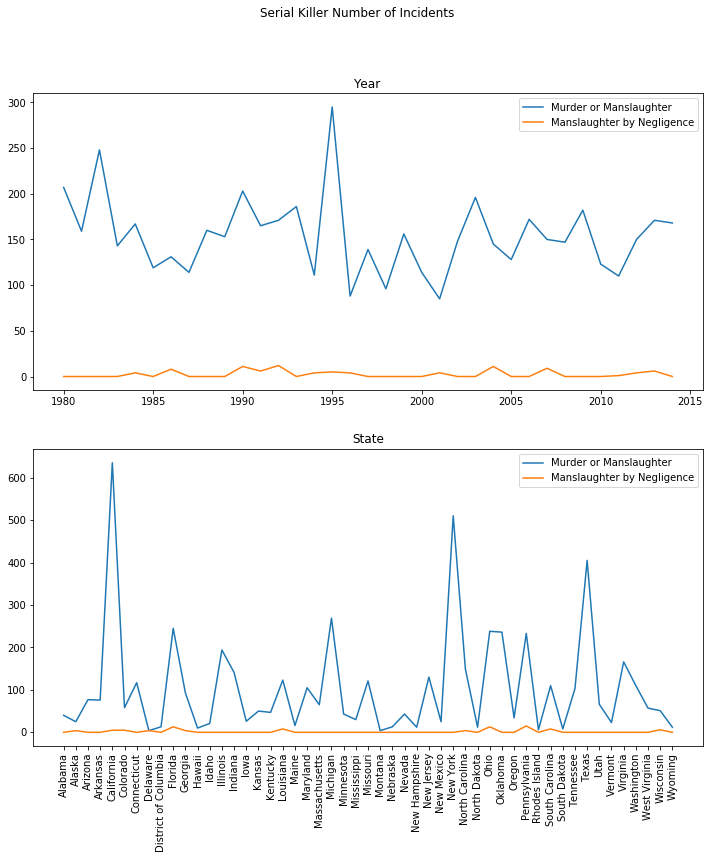

In [53]:
plt.subplots(2,1,figsize=(12,12))
plt.suptitle('Serial Killer Number of Incidents')

plt.subplot(2,1,1)
plt.plot(sk_year['Murder or Manslaughter'],label='Murder or Manslaughter')
plt.plot(sk_year['Manslaughter by Negligence'],label='Manslaughter by Negligence')
plt.title('Year')
plt.legend()

plt.subplot(2,1,2)
plt.plot(sk_state['Murder or Manslaughter'],label='Murder or Manslaughter')
plt.plot(sk_state['Manslaughter by Negligence'],label='Manslaughter by Negligence')
plt.title('State')
plt.xticks(rotation=90)
plt.legend()

##### Weapon & Relationship

Text(0.5, 1, 'Serial Killer Weapon Choice by Relationship')

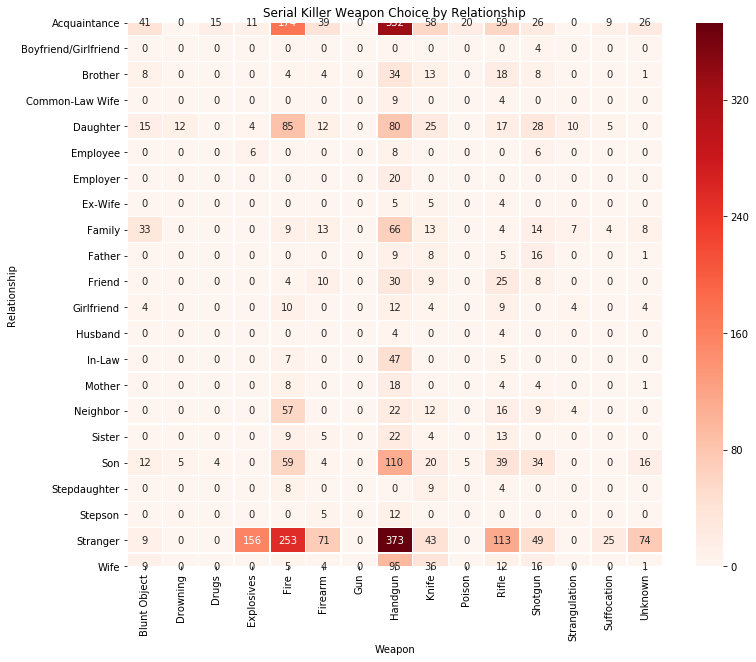

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(sk_relweapon,linewidth=.5,cmap='Reds',fmt='d',annot=True)
plt.title('Serial Killer Weapon Choice by Relationship')

##### Age Comparison

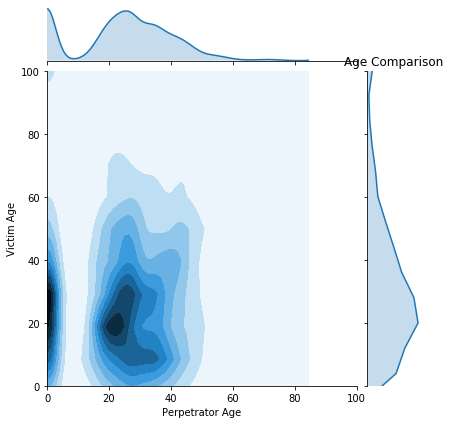

In [55]:
plot = sns.jointplot(x=sk['Perpetrator Age'],y=sk['Victim Age'],kind='kde')
plot.ax_marg_x.set_xlim(0, 100)
plot.ax_marg_y.set_ylim(0, 100)
plt.title('Age Comparison')
plt.show()

##### Personal Information

([<matplotlib.axis.XTick at 0x1a26811ac8>,
 <a list of 3 Text xticklabel objects>)

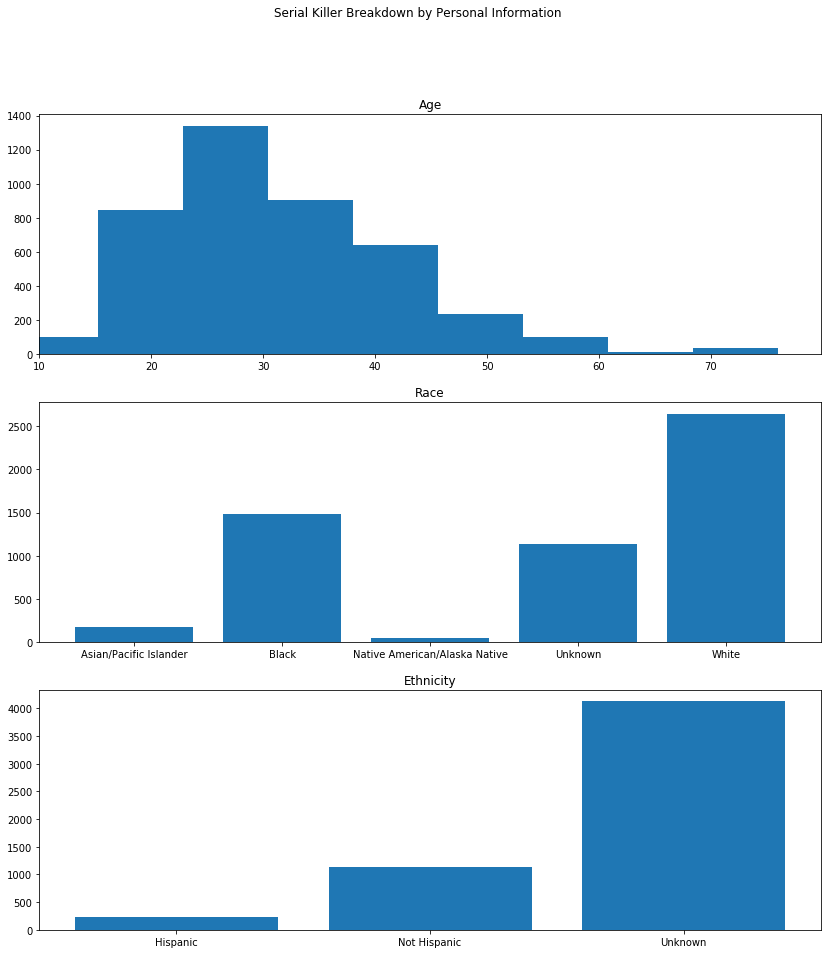

In [56]:
plt.subplots(3,1,figsize=(14,15))
plt.suptitle('Serial Killer Breakdown by Personal Information')

plt.subplot(3,1,1)
plt.hist(sk['Perpetrator Age'].astype(float))
plt.xlim(10)
plt.title('Age')

plt.subplot(3,1,2)
sk_race = pd.pivot_table(sk,values='Incident',index=['Perpetrator Race'],aggfunc='count',fill_value=0)
plt.title('Race')
plt.bar(range(len(sk_race)),sk_race['Incident'])
plt.xticks(range(len(sk_race)),sk_race.index)

plt.subplot(3,1,3)
sk_ethic = pd.pivot_table(sk,values='Incident',index=['Perpetrator Ethnicity'],aggfunc='count',fill_value=0)
plt.title('Ethnicity')
plt.bar(range(len(sk_ethic)),sk_ethic['Incident'])
plt.xticks(range(len(sk_ethic)),sk_ethic.index)


## Machine Learning Approach 

In [57]:
# Get a clean dataframe only contains needed data
ml = homicide.copy()
ml = ml.drop(['City','State','Year','Month','Incident','Crime Solved','Victim Count','Perpetrator Count','Solved'],axis=1)
ml.drop(ml[ml['Perpetrator Age'] == ' '].index,inplace=True)
ml['Perpetrator Age'] = ml['Perpetrator Age'].astype(float)
ml = ml[ml['Perpetrator Age'] >= 2]
ml = ml[ml['Victim Age'] > 0]
ml = ml[ml['Victim Age'] <= 100]
ml

,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
Record ID,,,,,,,,,,,
1,Murder or Manslaughter,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
2,Murder or Manslaughter,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation
4,Murder or Manslaughter,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation
6,Murder or Manslaughter,Male,30,White,Unknown,Male,36.0,White,Unknown,Acquaintance,Rifle
7,Murder or Manslaughter,Female,42,Native American/Alaska Native,Unknown,Male,27.0,Black,Unknown,Wife,Knife
...,...,...,...,...,...,...,...,...,...,...,...
638447,Murder or Manslaughter,Female,76,White,Not Hispanic,Male,48.0,White,Not Hispanic,Mother,Handgun
638448,Murder or Manslaughter,Female,21,Black,Not Hispanic,Male,22.0,White,Unknown,Girlfriend,Handgun
638449,Murder or Manslaughter,Male,29,Native American/Alaska Native,Unknown,Male,67.0,Black,Unknown,Friend,Firearm


In [58]:
#One-Hot Encoding
ml['crime type'] = ml['Crime Type'].apply(lambda x: 1 if x=='Murder or Manslaughter' else 0)
ml['v_sex_female'] = ml['Victim Sex'].apply(lambda x: 1 if x=='Female' else 0)
ml['v_sex_male'] = ml['Victim Sex'].apply(lambda x: 1 if x=='Male' else 0)
ml['p_sex'] = ml['Perpetrator Sex'].apply(lambda x: 1 if x=='Female' else 0)
ml['v_race_N'] = ml['Victim Race'].apply(lambda x: 1 if x=='Native American/Alaska Native' else 0)
ml['v_race_W'] = ml['Victim Race'].apply(lambda x: 1 if x=='White' else 0)
ml['v_race_B'] = ml['Victim Race'].apply(lambda x: 1 if x=='Black' else 0)
ml['v_race_U'] = ml['Victim Race'].apply(lambda x: 1 if x=='Unknown' else 0)
ml['v_race_A'] = ml['Victim Race'].apply(lambda x: 1 if x=='Asian/Pacific Islander' else 0)
ml['p_race_N'] = ml['Perpetrator Race'].apply(lambda x: 1 if x=='Native American/Alaska Native' else 0)
ml['p_race_W'] = ml['Perpetrator Race'].apply(lambda x: 1 if x=='White' else 0)
ml['p_race_B'] = ml['Perpetrator Race'].apply(lambda x: 1 if x=='Black' else 0)
ml['p_race_U'] = ml['Perpetrator Race'].apply(lambda x: 1 if x=='Unknown' else 0)
ml['p_race_A'] = ml['Perpetrator Race'].apply(lambda x: 1 if x=='Asian/Pacific Islander' else 0)
ml['v_e_U'] = ml['Victim Ethnicity'].apply(lambda x: 1 if x=='Unknown' else 0)
ml['v_e_N'] = ml['Victim Ethnicity'].apply(lambda x: 1 if x=='Not Hispanic' else 0)
ml['v_e_H'] = ml['Victim Ethnicity'].apply(lambda x: 1 if x=='Hispanic' else 0)
ml['p_e_U'] = ml['Perpetrator Ethnicity'].apply(lambda x: 1 if x=='Unknown' else 0)
ml['p_e_N'] = ml['Perpetrator Ethnicity'].apply(lambda x: 1 if x=='Not Hispanic' else 0)
ml['p_e_H'] = ml['Perpetrator Ethnicity'].apply(lambda x: 1 if x=='Hispanic' else 0)
ml['r1'] = ml['Relationship'].apply(lambda x: 1 if x=='Acquaintance' else 0)
ml['r2'] = ml['Relationship'].apply(lambda x: 1 if x=='Wife' else 0)
ml['r3'] = ml['Relationship'].apply(lambda x: 1 if x=='Unknown' else 0)
ml['r4'] = ml['Relationship'].apply(lambda x: 1 if x=='Stranger' else 0)
ml['r5'] = ml['Relationship'].apply(lambda x: 1 if x=='Girlfriend' else 0)
ml['r6'] = ml['Relationship'].apply(lambda x: 1 if x=='Ex-Husband' else 0)
ml['r7'] = ml['Relationship'].apply(lambda x: 1 if x=='Brother' else 0)
ml['r8'] = ml['Relationship'].apply(lambda x: 1 if x=='Stepdaughter' else 0)
ml['r9'] = ml['Relationship'].apply(lambda x: 1 if x=='Husband' else 0)
ml['r10'] = ml['Relationship'].apply(lambda x: 1 if x=='Sister' else 0)
ml['r11'] = ml['Relationship'].apply(lambda x: 1 if x=='Friend' else 0)
ml['r12'] = ml['Relationship'].apply(lambda x: 1 if x=='Family' else 0)
ml['r13'] = ml['Relationship'].apply(lambda x: 1 if x=='Neighbor' else 0)
ml['r14'] = ml['Relationship'].apply(lambda x: 1 if x=='Father' else 0)
ml['r15'] = ml['Relationship'].apply(lambda x: 1 if x=='In-Law' else 0)
ml['r16'] = ml['Relationship'].apply(lambda x: 1 if x=='Son' else 0)
ml['r17'] = ml['Relationship'].apply(lambda x: 1 if x=='Ex-Wife' else 0)
ml['r18'] = ml['Relationship'].apply(lambda x: 1 if x=='Boyfriend' else 0)
ml['r19'] = ml['Relationship'].apply(lambda x: 1 if x=='Mother' else 0)
ml['r20'] = ml['Relationship'].apply(lambda x: 1 if x=='Common_Law Husband' else 0)
ml['r21'] = ml['Relationship'].apply(lambda x: 1 if x=='Common_Law Wife' else 0)
ml['r22'] = ml['Relationship'].apply(lambda x: 1 if x=='Stepfather' else 0)
ml['r23'] = ml['Relationship'].apply(lambda x: 1 if x=='Stepson' else 0)
ml['r24'] = ml['Relationship'].apply(lambda x: 1 if x=='Stepmother' else 0)
ml['r25'] = ml['Relationship'].apply(lambda x: 1 if x=='Daughter' else 0)
ml['r26'] = ml['Relationship'].apply(lambda x: 1 if x=='Boyfriend/Girlfriend' else 0)
ml['r27'] = ml['Relationship'].apply(lambda x: 1 if x=='Employer' else 0)
ml['r28'] = ml['Relationship'].apply(lambda x: 1 if x=='Employee' else 0)
ml['w1'] = ml['Weapon'].apply(lambda x: 1 if x=='Blunt Object' else 0)
ml['w2'] = ml['Weapon'].apply(lambda x: 1 if x=='Strangulation' else 0)
ml['w3'] = ml['Weapon'].apply(lambda x: 1 if x=='Rifle' else 0)
ml['w4'] = ml['Weapon'].apply(lambda x: 1 if x=='Knife' else 0)
ml['w5'] = ml['Weapon'].apply(lambda x: 1 if x=='Firearm' else 0)
ml['w6'] = ml['Weapon'].apply(lambda x: 1 if x=='Shortgun' else 0)
ml['w7'] = ml['Weapon'].apply(lambda x: 1 if x=='Fall' else 0)
ml['w8'] = ml['Weapon'].apply(lambda x: 1 if x=='Handgun' else 0)
ml['w9'] = ml['Weapon'].apply(lambda x: 1 if x=='Drowning' else 0)
ml['w10'] = ml['Weapon'].apply(lambda x: 1 if x=='Unknown' else 0)
ml['w11'] = ml['Weapon'].apply(lambda x: 1 if x=='Suffocation' else 0)
ml['w12'] = ml['Weapon'].apply(lambda x: 1 if x=='Fire' else 0)
ml['w13'] = ml['Weapon'].apply(lambda x: 1 if x=='Drugs' else 0)
ml['w14'] = ml['Weapon'].apply(lambda x: 1 if x=='Explosives' else 0)
ml['w15'] = ml['Weapon'].apply(lambda x: 1 if x=='Gun' else 0)
ml['w16'] = ml['Weapon'].apply(lambda x: 1 if x=='Poison' else 0)

In [59]:
ml.drop(['Crime Type','Victim Sex','Victim Race','Victim Ethnicity','Perpetrator Sex',
         'Perpetrator Ethnicity','Perpetrator Race','Relationship','Weapon'],axis=1,inplace=True)

In [60]:
ml.dtypes

Victim Age           int64
Perpetrator Age    float64
crime type           int64
v_sex_female         int64
v_sex_male           int64
                    ...   
w12                  int64
w13                  int64
w14                  int64
w15                  int64
w16                  int64
Length: 66, dtype: object

In [61]:
from sklearn import ensemble, model_selection as ms, metrics

##### Random forest

In [62]:
ml_x = ml.drop('p_sex', axis=1)
ml_y = ml['p_sex']

X_train, X_test, y_train, y_test = ms.train_test_split(ml_x, ml_y, test_size=0.20)
X_train, X_dev, y_train, y_dev = ms.train_test_split(X_train, y_train, test_size=0.20)
parameters = {'max_depth':(2,4,6,8,10),\
              'min_samples_leaf':(0.1, 0.2, 0.3),\
              'min_samples_split':(0.1, 0.2, 0.3),\
              'max_features': (1,3,5,7)}

model = ensemble.RandomForestClassifier(n_estimators = 10)
grid_clf = ms.GridSearchCV(model, parameters, cv=5)
grid_clf.fit(X_dev, y_dev)

best_params = grid_clf.best_params_

print("Trees", "Acc Scores", sep = '\t')

best_params['n_estimators'] = 10

clf = ensemble.RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)
clf_scores = clf.score(X_test, y_test)
print(clf_scores, sep = '\t')

Trees	Acc Scores
0.8935839133424205


##### SVM 
failed, even with scaling and sampling 

##### Regression
not consider with so many attributes

##### Naive Bayes
failed

## Conclusion

This jupyter notebook only helps with walking through the project and check out the detailed coding.\
See more explanations about each plot in the paper.